# Análise dos dados das viagens realizadas a serviço
Com base nos dados disponibilizados Portal da Transparencia, vamos analisar os dados das viagens realizadas à serviço, pelos funcionários públicos federais, no ano de 2018.

Os dados podem ser baixados nesse site: http://www.transparencia.gov.br/download-de-dados/viagens

Dicionário de Dados: 
http://www.transparencia.gov.br/pagina-interna/603364-dicionário-de-dados-viagens-a-Serviço-Pagamentos

O Arquivo que será utilizado nesta análise exploratória está no formato CSV e será o **2018_Pagamento.csv**

# Configução do ambiente

In [97]:
# Importando o módulo pandas
import pandas as pd

In [101]:
# Para mostrar os dados em gráfico, precisamos informar que queremos visualizar o gráfico dentro do notebook.
# Utilizaremos o framewrk matplot 
# Os dados serão visualizados em um gráfico de barras
%matplotlib inline 

# podemos configurar o IPython Notebook para produzir gráficos em SVG (formato vetorial), que não perde a definição.
%config InlineBackend.figure_format='svg'

# Leitura de arquivo csv

**Atenção:** Neste trabalho será utilizado o arquivo CSV **2018_Pagamento.csv**

In [ ]:
# Carregando o arquivo csv
df = pd.read_csv('2018_Pagamento.csv')

# UnicodeDecodeError: 'utf-8' codec can't decode : 
#    O problema ocorrido é devido à codificacao Unicode do arquivo

In [ ]:
# Importando o arquivo passando o encoding
# O código cp1252 é o padrão de arquicos csv gerados pelo excel. No geral descobrimos os encoding pesquisando no google
df = pd.read_csv('2018_Pagamento.csv', encoding='cp1252' )

# ParserError: Error tokenizing data. 
#    O problema ocorrido é devido ao separador de campos utilizado no arquivo.

In [102]:
# O arquivo é separado por ';' e o encoding é cp1252
df = pd.read_csv('2018_Pagamento.csv', sep=';', encoding='cp1252' )

É possivel importar apenas algumas colunas de um arquivo CSV<br>
Exemplo:
- Nome do órgão superior : 2
- Nome do órgao pagador  : 4
- Nome da unidade gestora pagadora : 6
- Tipo de pagamento : 7

Código:<br>
df = pd.read_csv('2018_Pagamento.csv', sep=';', encoding='cp1252', usecols=[2, 4, 6, 7, 8] )

Também é possivel trocar os nomes das colunas<br>
Código<br>
df.columns = ['Superior', 'Pagador', 'Unidade', 'Tipo', 'Valor_STR']



# Comando para visualizar pequenas amostras dos dados

In [ ]:
# Exibe os primeiros cindo registros lidos
df.head()

In [ ]:
# Exibe os primeiros n registros do dataframe
df.head( 20 )

In [ ]:
# Exibe os ultimos n registros do dataframe
df.tail( 10)

In [ ]:
# Exibe linhas aleatórias, é obrigatório passar o número da amostra
df.sample( 10 )

In [ ]:
# comando para verificar o tamnho do dataframe.
# Formato(linhas, colunas)
df.shape

In [100]:
# Verificar os tipos de dados das colunas 
df.dtypes

Identificador do processo de viagem     int64
Código do órgão superior                int64
Nome do órgão superior                 object
Codigo do órgão pagador                 int64
Nome do órgao pagador                  object
Código da unidade gestora pagadora      int64
Nome da unidade gestora pagadora       object
Tipo de pagamento                      object
Valor                                  object
dtype: object

In [ ]:
# Função que conta o número de ocorrencias das colunas
df.count()

In [ ]:
# Analise matemática dos dados
df.describe()

In [113]:
# DEscrever os dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1622284 entries, 0 to 1622283
Data columns (total 9 columns):
Identificador do processo de viagem    1622284 non-null int64
Código do órgão superior               1622284 non-null int64
Nome do órgão superior                 1622284 non-null object
Codigo do órgão pagador                1622284 non-null int64
Nome do órgao pagador                  1439518 non-null object
Código da unidade gestora pagadora     1622284 non-null int64
Nome da unidade gestora pagadora       1622284 non-null object
Tipo de pagamento                      1622284 non-null object
Valor                                  1622284 non-null object
dtypes: int64(4), object(5)
memory usage: 111.4+ MB


# Comandos para manipulação dos dados

## Ajustando a coluna Valor para o tipo númerico Float

In [130]:
# O Comando replace substitui a ',' por ponto antes de fazer a conversão de tipos (Type Cast, ou simplesmente Cast). 
# Apos a conversão de tipos, os valores convertidos são atribuidos a mesma coluna 
df['Valor'] = pd.to_numeric( df['Valor'].str.replace( ',', '.') )

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1622284 entries, 0 to 1622283
Data columns (total 9 columns):
Identificador do processo de viagem    1622284 non-null int64
Código do órgão superior               1622284 non-null int64
Nome do órgão superior                 1622284 non-null object
Codigo do órgão pagador                1622284 non-null int64
Nome do órgao pagador                  1439518 non-null object
Código da unidade gestora pagadora     1622284 non-null int64
Nome da unidade gestora pagadora       1622284 non-null object
Tipo de pagamento                      1622284 non-null object
Valor                                  1622284 non-null float64
dtypes: float64(1), int64(4), object(4)
memory usage: 111.4+ MB


## unique() : Método que lista os valores únicos numa coluna 

In [107]:
df['Nome do órgão superior'].unique()

array(['Ministério da Educação', 'Ministério das Relações Exteriores',
       'Ministério da Defesa', 'Sigiloso', 'Ministério da Saúde',
       'Ministério da Economia', 'Ministério de Minas e Energia',
       'Ministério da Infraestrutura',
       'Ministério da Ciência, Tecnologia, Inovações e Comunicações',
       'Advocacia-Geral da União',
       'Ministério da Justiça e Segurança Pública',
       'Presidência da República', 'Controladoria-Geral da União',
       'Ministério da Agricultura, Pecuária e Abastecimento',
       'Ministério da Cidadania',
       'Ministério do Desenvolvimento Regional',
       'Ministério do Meio Ambiente', 'Ministério do Turismo',
       'Ministério da Mulher, Família e Direitos Humanos',
       'Sem informação'], dtype=object)

## value_counts() : Método para retonar a quantidade de ocorrências unicas de cada valor para uma coluna

In [108]:
#Quantidade de registros por coluna. Neste caso estamos vendo a quantidade de pagamentos por órgão superior
df['Nome do órgão superior'].value_counts()

Ministério da Educação                                         477873
Ministério da Economia                                         271838
Sigiloso                                                       182599
Ministério da Defesa                                           179739
Ministério da Saúde                                             94309
Ministério da Agricultura, Pecuária e Abastecimento             84633
Ministério da Justiça e Segurança Pública                       72516
Ministério do Meio Ambiente                                     48633
Ministério da Infraestrutura                                    45714
Ministério da Cidadania                                         29191
Ministério da Ciência, Tecnologia, Inovações e Comunicações     25141
Ministério da Mulher, Família e Direitos Humanos                20552
Presidência da República                                        20411
Ministério de Minas e Energia                                   19545
Ministério do Desenv

In [142]:
# Os valores contados também podem ser normalizados para expressar porcentagens
df['Nome do órgão superior'].value_counts(normalize=True)

Sem informação                                                 0.000103
Ministério do Turismo                                          0.001685
Controladoria-Geral da União                                   0.004010
Ministério das Relações Exteriores                             0.005436
Advocacia-Geral da União                                       0.007965
Ministério do Desenvolvimento Regional                         0.011369
Ministério de Minas e Energia                                  0.012048
Presidência da República                                       0.012582
Ministério da Mulher, Família e Direitos Humanos               0.012669
Ministério da Ciência, Tecnologia, Inovações e Comunicações    0.015497
Ministério da Cidadania                                        0.017994
Ministério da Infraestrutura                                   0.028179
Ministério do Meio Ambiente                                    0.029978
Ministério da Justiça e Segurança Pública                      0

In [140]:
# Mudando a ordem de exibição da lista
df['Nome do órgão superior'].value_counts(ascending=False)

Ministério da Educação                                         477873
Ministério da Economia                                         271838
Sigiloso                                                       182599
Ministério da Defesa                                           179739
Ministério da Saúde                                             94309
Ministério da Agricultura, Pecuária e Abastecimento             84633
Ministério da Justiça e Segurança Pública                       72516
Ministério do Meio Ambiente                                     48633
Ministério da Infraestrutura                                    45714
Ministério da Cidadania                                         29191
Ministério da Ciência, Tecnologia, Inovações e Comunicações     25141
Ministério da Mulher, Família e Direitos Humanos                20552
Presidência da República                                        20411
Ministério de Minas e Energia                                   19545
Ministério do Desenv

## groupby() : Método usado para agrupar registros de um DataFrame em grupos

Funções de agregação: <br>
- sum() : Soma
- mean() : Média
- count() : conta todos os valores 
- size() : Conta valores não nulos 
- max() : Valor máximo
- min()	: Valor Mínimo 
- std() : Desvio padrão 
- median() : Mediana

In [194]:
# Comando para formar o valor Float
pd.options.display.float_format = '{:.2f}'.format

In [195]:
# Agrupando por valor e mostrando a quantidade de viagens 
df.groupby(['Nome do órgão superior'])['Valor'].count().sort_values(ascending=False)

Nome do órgão superior
Ministério da Educação                                         477873
Ministério da Economia                                         271838
Sigiloso                                                       182599
Ministério da Defesa                                           179739
Ministério da Saúde                                             94309
Ministério da Agricultura, Pecuária e Abastecimento             84633
Ministério da Justiça e Segurança Pública                       72516
Ministério do Meio Ambiente                                     48633
Ministério da Infraestrutura                                    45714
Ministério da Cidadania                                         29191
Ministério da Ciência, Tecnologia, Inovações e Comunicações     25141
Ministério da Mulher, Família e Direitos Humanos                20552
Presidência da República                                        20411
Ministério de Minas e Energia                                   195

In [198]:
# Total de valor gasto
df['Valor'].sum()

1412575868.1999996

In [199]:
# Agrupando por Tipo de Pagamento e o somatório dos seus valores
df.groupby(['Tipo de pagamento'])['Valor'].sum().sort_values(ascending=False)

Tipo de pagamento
DIÁRIAS                     909111622.16
PASSAGEM                    495528244.20
RESTITUIÇÃO                   6962292.86
Serviço correlato: seguro      954967.08
Taxa de agenciamento            18741.90
Name: Valor, dtype: float64

In [156]:
# Agrupando por Orgao Superior e somatório de valores
df.groupby(['Nome do órgão superior'])['Valor'].sum().sort_values(ascending=False)

Nome do órgão superior
Ministério da Educação                                        301296767.21
Sigiloso                                                      192818965.25
Ministério da Justiça e Segurança Pública                     182741772.92
Ministério da Economia                                        177398140.70
Ministério da Defesa                                          168766177.27
Ministério da Saúde                                            72316849.62
Ministério da Agricultura, Pecuária e Abastecimento            66203260.60
Ministério do Meio Ambiente                                    45832393.15
Ministério da Infraestrutura                                   37023680.77
Ministério das Relações Exteriores                             31810188.53
Ministério da Ciência, Tecnologia, Inovações e Comunicações    26665635.36
Ministério da Cidadania                                        23209574.91
Presidência da República                                       20581779.04
Mi

# Visualização dos dados

Métodos uteis: <br>
- sort_values() : Ordenar os valores. O parametro opcional ascending (valores possiveis False | True) modifica a ordenacao 
- nlargest() : Exibe n maiores elementos
- nlowest() : Exibe n menores elementos

## Grafico em Barras

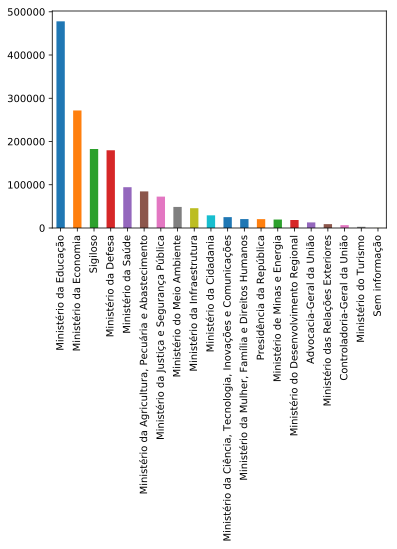

In [163]:
# Grafico que exibe a quantidade de viagens por orgão
df['Nome do órgão superior'].value_counts().plot.bar()

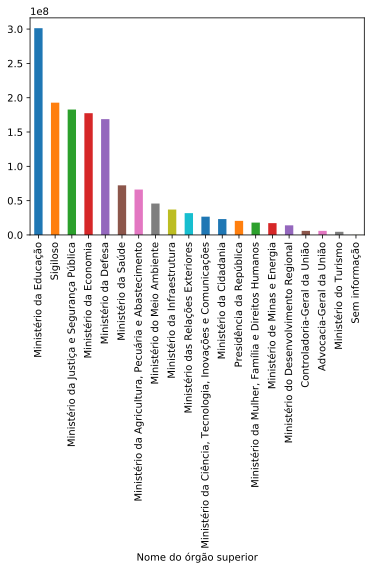

In [165]:
# Grafico em barras que exibe os valores por orgão
df.groupby(['Nome do órgão superior'])['Valor'].sum().sort_values(ascending=False).plot.bar()

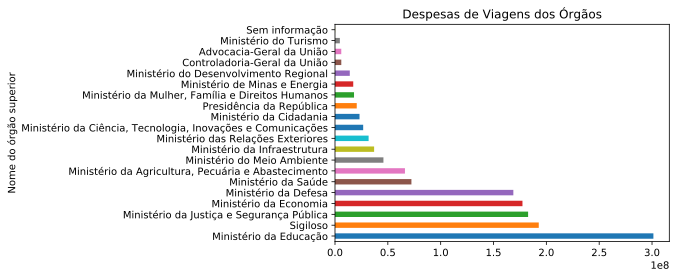

In [196]:
# Grafico em barras, na horizontal, que exibe os valores por orgão
df.groupby(['Nome do órgão superior'])['Valor'].sum().sort_values(ascending=False).plot.barh(title="Despesas de Viagens dos Órgãos")

## Gráfico Pizza

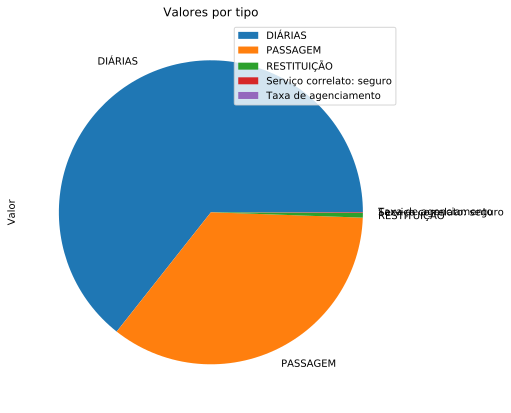

In [193]:
df.groupby(['Tipo de pagamento'])['Valor'].sum().plot.pie(title='Valores por tipo', legend=True, figsize=(7, 7))

***

# Separando um subconjunto de dados

## Dados dos Institutos Federais 

In [202]:
# Filtranto os dados apenas por institutos federais 
df_if = df[ (df['Nome do órgão superior'] == 'Ministério da Educação') & (df['Nome do órgao pagador'].str.contains( 'Instituto Federal' )) ]

In [222]:
# Lista de Institutos e quantidade de pagamentos 
df_if['Nome do órgao pagador'].value_counts()

Instituto Federal do Espírito Santo                             7747
Instituto Federal do Mato Grosso                                6929
Instituto Federal do Ceará                                      6781
Instituto Federal do Maranhão                                   6698
Instituto Federal de São Paulo                                  6620
Instituto Federal de Alagoas                                    5824
Instituto Federal de Pernambuco                                 5803
Instituto Federal Goiano                                        5477
Instituto Federal da Paraíba                                    5440
Instituto Federal Catarinense                                   5298
Instituto Federal de Santa Catarina                             5202
Instituto Federal do Paraná                                     5183
Instituto Federal do Rio Grande do Norte                        5060
Instituto Federal Baiano                                        5006
Instituto Federal do Rio Grande do

In [223]:
# Lista de Institutos e valores pagos 
df_if.groupby(['Nome do órgao pagador'])['Valor'].sum()

Nome do órgao pagador
Instituto Federal Baiano                                       2665009.71
Instituto Federal Catarinense                                  1811639.07
Instituto Federal Farroupilha                                  1328575.63
Instituto Federal Fluminense                                   1195312.35
Instituto Federal Goiano                                       2028702.04
Instituto Federal Sul-rio-grandense                            1381761.55
Instituto Federal da Bahia                                     1914013.48
Instituto Federal da Paraíba                                   2610118.60
Instituto Federal de Alagoas                                   2199462.95
Instituto Federal de Brasília                                   162809.29
Instituto Federal de Educação, Ciência e Tecnologia de Goiás   1102020.63
Instituto Federal de Minas Gerais                              1354797.11
Instituto Federal de Pernambuco                                1906603.33
Instituto Federa

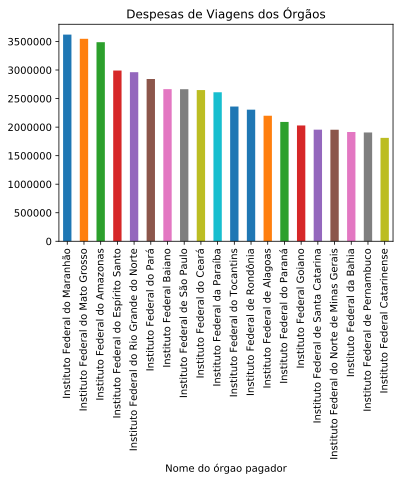

In [224]:
# Exibe um grafico em barras com os 10 Institutos com maior valor de gasto em viagens 
df_if.groupby(['Nome do órgao pagador'])['Valor'].sum().nlargest(20).plot.bar(title="Despesas de Viagens dos Órgãos")

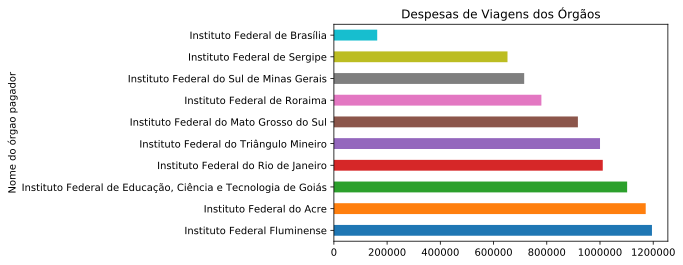

In [229]:
# Exibe um grafico em barras com os 10 Institutos Federais com menor valor de gasto em viagens
df_if.groupby(['Nome do órgao pagador'])['Valor'].sum().nsmallest(10).sort_values(ascending=False).plot.barh(title="Despesas de Viagens dos Órgãos")

## Dados do Instituto Federal da Bahia 

Observação: faremos os agrupamentos pelo campo: Nome da unidade gestora pagadora

In [231]:
# Filtrando Dados
# Filtranto os dados apenas por institutos federais 
df_ifba = df[ (df['Nome do órgão superior'] == 'Ministério da Educação') & (df['Nome do órgao pagador'].str.contains( 'Instituto Federal da Bahia' )) ].copy()

In [234]:
# Listar todas as unidades gestoras 
df_ifba['Nome da unidade gestora pagadora'].unique()

array(['INST. FED. DA BAHIA/CAMPUS VIT. DA CONQUISTA',
       'INST. FED. DA BAHIA/CAMPUS EUNAPOLIS',
       'INST.FED.DE EDUC.,CIENC.E TEC.DA BAHIA',
       'INST. FED. DA BAHIA/CAMPUS SALVADOR',
       'INST. FED. DA BAHIA/CAMPUS VALENÇA',
       'INST. FED. DA BAHIA/CAMPUS SEABRA',
       'INST. FED. DA BAHIA/CAMPUS JACOBINA',
       'INST. FED. DA BAHIA/CAMPUS IRECE',
       'INST. FED.DA BAHIA/CAMPUS SIMOES FILHO',
       'INST. FED. DA BAHIA/CAMPUS BARREIRAS',
       'INST. FED. DA BAHIA/CAMPUS JEQUIE',
       'INST. FED. DA BAHIA/CAMPUS ILHEUS',
       'INST. FED. DA BAHIA/CAMPI PAULO AFONSO',
       'INST. FED. DA BAHIA/CAMPUS PORTO SEGURO',
       'INST. FED. DA BAHIA/CAMPUS SANTO AMARO',
       'INST. FED. DA BAHIA/CAMPUS FEIRA DE SANTANA',
       'INST. FED. DA BAHIA/CAMPUS CAMAÇARI'], dtype=object)

In [236]:
# Lista de quantidade de pagamentos das unidades gestoras do IFBA
df_ifba['Nome da unidade gestora pagadora'].value_counts()

INST.FED.DE EDUC.,CIENC.E TEC.DA BAHIA          1209
INST. FED. DA BAHIA/CAMPUS SALVADOR              439
INST. FED. DA BAHIA/CAMPUS VIT. DA CONQUISTA     274
INST. FED. DA BAHIA/CAMPUS EUNAPOLIS             159
INST. FED. DA BAHIA/CAMPUS BARREIRAS             120
INST. FED. DA BAHIA/CAMPUS SEABRA                113
INST. FED.DA BAHIA/CAMPUS SIMOES FILHO            99
INST. FED. DA BAHIA/CAMPUS JACOBINA               98
INST. FED. DA BAHIA/CAMPUS IRECE                  81
INST. FED. DA BAHIA/CAMPUS VALENÇA                75
INST. FED. DA BAHIA/CAMPUS ILHEUS                 62
INST. FED. DA BAHIA/CAMPUS JEQUIE                 49
INST. FED. DA BAHIA/CAMPUS PORTO SEGURO           39
INST. FED. DA BAHIA/CAMPI PAULO AFONSO            28
INST. FED. DA BAHIA/CAMPUS FEIRA DE SANTANA       25
INST. FED. DA BAHIA/CAMPUS SANTO AMARO            20
INST. FED. DA BAHIA/CAMPUS CAMAÇARI                9
Name: Nome da unidade gestora pagadora, dtype: int64

In [255]:
# Agrupamento das unidades gestoras com o somatórios dos gastos com viagens
df_ifba.groupby(['Nome da unidade gestora pagadora'])['Valor'].sum().sort_values(ascending=False)

Nome da unidade gestora pagadora
INST.FED.DE EDUC.,CIENC.E TEC.DA BAHIA         730719.94
INST. FED. DA BAHIA/CAMPUS SALVADOR            377149.03
INST. FED. DA BAHIA/CAMPUS VIT. DA CONQUISTA   189001.43
INST. FED. DA BAHIA/CAMPUS EUNAPOLIS            97615.49
INST. FED.DA BAHIA/CAMPUS SIMOES FILHO          92426.17
INST. FED. DA BAHIA/CAMPUS BARREIRAS            89137.27
INST. FED. DA BAHIA/CAMPUS SEABRA               56928.37
INST. FED. DA BAHIA/CAMPUS JACOBINA             47102.43
INST. FED. DA BAHIA/CAMPUS ILHEUS               42344.44
INST. FED. DA BAHIA/CAMPUS IRECE                38154.87
INST. FED. DA BAHIA/CAMPUS JEQUIE               33819.48
INST. FED. DA BAHIA/CAMPUS PORTO SEGURO         31722.84
INST. FED. DA BAHIA/CAMPUS VALENÇA              27734.88
INST. FED. DA BAHIA/CAMPI PAULO AFONSO          21863.94
INST. FED. DA BAHIA/CAMPUS SANTO AMARO          18718.47
INST. FED. DA BAHIA/CAMPUS FEIRA DE SANTANA     16239.11
INST. FED. DA BAHIA/CAMPUS CAMAÇARI              3335.3

In [259]:
# Listagem dos 10 maiores pagamentos feitos pelo IFBA
df_ifba.nlargest(10, 'Valor')

,Identificador do processo de viagem,Código do órgão superior,Nome do órgão superior,Codigo do órgão pagador,Nome do órgao pagador,Código da unidade gestora pagadora,Nome da unidade gestora pagadora,Tipo de pagamento,Valor
993508,15260538,26000,Ministério da Educação,26427,Instituto Federal da Bahia,158409,INST. FED. DA BAHIA/CAMPUS VIT. DA CONQUISTA,DIÁRIAS,13124.07
1385519,15564769,26000,Ministério da Educação,26427,Instituto Federal da Bahia,158411,INST. FED. DA BAHIA/CAMPUS SALVADOR,DIÁRIAS,12303.48
1059116,15311004,26000,Ministério da Educação,26427,Instituto Federal da Bahia,158411,INST. FED. DA BAHIA/CAMPUS SALVADOR,DIÁRIAS,12066.14
552049,14933711,26000,Ministério da Educação,26427,Instituto Federal da Bahia,158411,INST. FED. DA BAHIA/CAMPUS SALVADOR,DIÁRIAS,11644.99
393786,14822103,26000,Ministério da Educação,26427,Instituto Federal da Bahia,158411,INST. FED. DA BAHIA/CAMPUS SALVADOR,DIÁRIAS,11609.84
481178,14883856,26000,Ministério da Educação,26427,Instituto Federal da Bahia,158407,INST. FED.DA BAHIA/CAMPUS SIMOES FILHO,DIÁRIAS,9692.86
1154688,15383006,26000,Ministério da Educação,26427,Instituto Federal da Bahia,158411,INST. FED. DA BAHIA/CAMPUS SALVADOR,DIÁRIAS,7553.54
1059117,15311004,26000,Ministério da Educação,26427,Instituto Federal da Bahia,158411,INST. FED. DA BAHIA/CAMPUS SALVADOR,PASSAGEM,6351.24
1060062,15311701,26000,Ministério da Educação,26427,Instituto Federal da Bahia,158411,INST. FED. DA BAHIA/CAMPUS SALVADOR,PASSAGEM,6351.24
859372,15159054,26000,Ministério da Educação,26427,Instituto Federal da Bahia,158409,INST. FED. DA BAHIA/CAMPUS VIT. DA CONQUISTA,DIÁRIAS,5927.65


In [260]:
# Listagem dos 10 menores pagamentos feitos pelo IFBA
df_ifba.nsmallest(10, 'Valor')

,Identificador do processo de viagem,Código do órgão superior,Nome do órgão superior,Codigo do órgão pagador,Nome do órgao pagador,Código da unidade gestora pagadora,Nome da unidade gestora pagadora,Tipo de pagamento,Valor
386861,14817152,26000,Ministério da Educação,26427,Instituto Federal da Bahia,158411,INST. FED. DA BAHIA/CAMPUS SALVADOR,PASSAGEM,14.20
617631,14980375,26000,Ministério da Educação,26427,Instituto Federal da Bahia,158411,INST. FED. DA BAHIA/CAMPUS SALVADOR,PASSAGEM,27.79
617633,14980375,26000,Ministério da Educação,26427,Instituto Federal da Bahia,158411,INST. FED. DA BAHIA/CAMPUS SALVADOR,PASSAGEM,27.79
834443,15140699,26000,Ministério da Educação,26427,Instituto Federal da Bahia,158411,INST. FED. DA BAHIA/CAMPUS SALVADOR,PASSAGEM,27.79
834445,15140699,26000,Ministério da Educação,26427,Instituto Federal da Bahia,158411,INST. FED. DA BAHIA/CAMPUS SALVADOR,PASSAGEM,27.79
976689,15247627,26000,Ministério da Educação,26427,Instituto Federal da Bahia,158411,INST. FED. DA BAHIA/CAMPUS SALVADOR,PASSAGEM,27.79
1165269,15391134,26000,Ministério da Educação,26427,Instituto Federal da Bahia,158411,INST. FED. DA BAHIA/CAMPUS SALVADOR,PASSAGEM,27.79
1165271,15391134,26000,Ministério da Educação,26427,Instituto Federal da Bahia,158411,INST. FED. DA BAHIA/CAMPUS SALVADOR,PASSAGEM,27.79
386858,14817152,26000,Ministério da Educação,26427,Instituto Federal da Bahia,158411,INST. FED. DA BAHIA/CAMPUS SALVADOR,PASSAGEM,28.80
395224,14823190,26000,Ministério da Educação,26427,Instituto Federal da Bahia,158591,INST. FED. DA BAHIA/CAMPUS SEABRA,DIÁRIAS,36.91


***

## Obrigado - Othon Campos - <a href="https://www.portal.ifba.edu.br/paulo-afonso"> IFBA - Paulo Afonso</a>